## Texture Synthesis

### Texture Synthesis via Optimization

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  
from accelerate.utils import set_seed
from diffusers import AutoencoderKL, DDIMScheduler, UNet2DConditionModel
from pipeline_sd import ADPipeline
from utils import *

model_name = "/root/models/stable-diffusion-v1-5"
vae = ""
lr = 0.05
iters = 1
seed = 42
width, height = 512, 512
weight = 0
batch_size = 3
mixed_precision = "bf16"
num_inference_steps = 300
enable_gradient_checkpoint = False
start_layer, end_layer = 10, 16


style_image = ["./data/texture/4.jpg"]
content_image = ""


scheduler = DDIMScheduler.from_pretrained(model_name, subfolder="scheduler")
pipe = ADPipeline.from_pretrained(
    model_name, scheduler=scheduler, safety_checker=None
)
if vae != "":
    vae = AutoencoderKL.from_pretrained(vae)
    pipe.vae = vae
pipe.classifier = pipe.unet
set_seed(seed)

style_image = torch.cat([load_image(path, size=(512, 512)) for path in style_image])
rec_style_image = pipe.latent2image(pipe.image2latent(style_image))
if content_image == "":
    content_image = None
else:
    content_image = load_image(content_image, size=(width, height))
controller = Controller(self_layers=(start_layer, end_layer))
result = pipe.optimize(
    lr=lr,
    batch_size=batch_size,
    iters=iters,
    width=width,
    height=height,
    weight=weight,
    controller=controller,
    style_image=style_image,
    content_image=content_image,
    mixed_precision=mixed_precision,
    num_inference_steps=num_inference_steps,
    enable_gradient_checkpoint=enable_gradient_checkpoint,
)

save_image(style_image, "style.png")
save_image(result, "output.png")
show_image("style.png", title="style image")
show_image("output.png", title="generated")

### Texture Synthesis via Sample

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  
from accelerate.utils import set_seed
from diffusers import AutoencoderKL, DDIMScheduler
from pipeline_sd import ADPipeline
from utils import *

model_name = "/root/models/stable-diffusion-v1-5"
vae = ""
lr = 0.05
iters =3
seed = 42
width, height = 512, 512
weight = 0.
mixed_precision = "bf16"
num_inference_steps = 50
guidance_scale = 1
num_images_per_prompt = 3
enable_gradient_checkpoint = False
start_layer, end_layer = 10, 16


style_image = ["./data/texture/8.jpg"]
content_image = ""

scheduler = DDIMScheduler.from_pretrained(model_name, subfolder="scheduler")
pipe = ADPipeline.from_pretrained(model_name, scheduler=scheduler, safety_checker=None)
if vae != "":
    vae = AutoencoderKL.from_pretrained(vae)
    pipe.vae = vae
pipe.classifier = pipe.unet
set_seed(seed)

style_image = torch.cat([load_image(path, size=(512, 512)) for path in style_image])
rec_style_image = pipe.latent2image(pipe.image2latent(style_image))
if content_image == "":
    content_image = None
else:
    content_image = load_image(content_image, size=(width, height))
controller = Controller(self_layers=(start_layer, end_layer))

result = pipe.sample(
    lr=lr,
    adain=False,
    iters=iters,
    width=width,
    height=height,
    weight=weight,
    controller=controller,
    style_image=style_image,
    content_image=content_image,
    prompt="",
    negative_prompt="",
    mixed_precision=mixed_precision,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    num_images_per_prompt=num_images_per_prompt,
    enable_gradient_checkpoint=enable_gradient_checkpoint,
)

save_image(style_image, "style.png")
save_image(result, "output.png")
show_image("style.png", title="style image")
show_image("output.png", title="generated")

### Texture Synthesis via MultiDiffusion

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
from accelerate.utils import set_seed
from diffusers import AutoencoderKL, DDIMScheduler
from pipeline_sd import ADPipeline
from utils import *

model_name = "/root/models/stable-diffusion-v1-5"
vae = ""
lr = 0.05
iters = 2
seed = 42
width, height = 512*2, 512
weight = 0.0
mixed_precision = "bf16"
num_inference_steps = 50
guidance_scale = 1
num_images_per_prompt = 1
enable_gradient_checkpoint = False
start_layer, end_layer = 10, 16


style_image = ["./data/texture/17.jpg"]
content_image = ""

scheduler = DDIMScheduler.from_pretrained(model_name, subfolder="scheduler")
pipe = ADPipeline.from_pretrained(model_name, scheduler=scheduler, safety_checker=None)
if vae != "":
    vae = AutoencoderKL.from_pretrained(vae)
    pipe.vae = vae

pipe.classifier = pipe.unet
set_seed(seed)

style_image = torch.cat([load_image(path, size=(512, 512)) for path in style_image])
if content_image == "":
    content_image = None
else:
    content_image = load_image(content_image, size=(width, height))
controller = Controller(self_layers=(start_layer, end_layer))

result = pipe.panorama(
    lr=lr,
    iters=iters,
    width=width,
    height=height,
    weight=weight,
    controller=controller,
    style_image=style_image,
    content_image=content_image,
    prompt="",
    negative_prompt="",
    stride=8,
    view_batch_size=8,
    mixed_precision=mixed_precision,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    num_images_per_prompt=num_images_per_prompt,
    enable_gradient_checkpoint=enable_gradient_checkpoint,
)

save_image(style_image, "style.png")
save_image(result, "output.png")
show_image("style.png", title="style image")
show_image("output.png", title="generated")

## Style/Appearance Transfer

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 
from accelerate.utils import set_seed
from diffusers import AutoencoderKL, DDIMScheduler
from pipeline_sd import ADPipeline
from utils import *

model_name = "/root/models/stable-diffusion-v1-5"
vae = ""
lr = 0.05
iters = 1
seed = 42
width = 512
height = 512
weight = 0.25
batch_size = 1
mixed_precision = "bf16"
num_inference_steps = 200
guidance_scale = 1
num_images_per_prompt = 1
enable_gradient_checkpoint = False
start_layer, end_layer = 10, 16


style_image = ["./data/style/12.jpg"]
content_image = "./data/content/deer.jpg"


scheduler = DDIMScheduler.from_pretrained(model_name, subfolder="scheduler")
pipe = ADPipeline.from_pretrained(
    model_name, scheduler=scheduler, safety_checker=None
)
if vae != "":
    vae = AutoencoderKL.from_pretrained(vae)
    pipe.vae = vae

pipe.classifier = pipe.unet
set_seed(seed)

style_image = torch.cat([load_image(path, size=(512, 512)) for path in style_image])
if content_image == "":
    content_image = None
else:
    content_image = load_image(content_image, size=(width, height))
controller = Controller(self_layers=(start_layer, end_layer))
result = pipe.optimize(
    lr=lr,
    batch_size=batch_size,
    iters=iters,
    width=width,
    height=height,
    weight=weight,
    controller=controller,
    style_image=style_image,
    content_image=content_image,
    mixed_precision=mixed_precision,
    num_inference_steps=num_inference_steps,
    enable_gradient_checkpoint=enable_gradient_checkpoint,
)

save_image(style_image, "style.png")
save_image(content_image, "content.png")
save_image(result, "output.png")
show_image("style.png", title="style image")
show_image("content.png", title="content image")
show_image("output.png", title="generated")

## Style-specific T2I Generation 

### Style-specific T2I Generation with SD1.5

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  
from pipeline_sd import ADPipeline
from diffusers import DDIMScheduler, AutoencoderKL
import torch
from utils import *
from accelerate.utils import set_seed


model_name = "/root/models/stable-diffusion-v1-5"
vae = ""
lr = 0.015
iters = 3
seed = 42
mixed_precision = "bf16"
num_inference_steps = 50
guidance_scale = 7.5
num_images_per_prompt = 3
enable_gradient_checkpoint = False
start_layer, end_layer = 10, 16

prompt = "A deer"
style_image = ["./data/style/1.jpg"]

scheduler = DDIMScheduler.from_pretrained(model_name, subfolder="scheduler")
pipe = ADPipeline.from_pretrained(
    model_name, scheduler=scheduler, safety_checker=None
)
if vae != "":
    vae = AutoencoderKL.from_pretrained(vae)
    pipe.vae = vae

pipe.classifier = pipe.unet
set_seed(seed)

style_image = torch.cat([load_image(path, size=(512, 512)) for path in style_image])
controller = Controller(self_layers=(start_layer, end_layer))

result = pipe.sample(
    controller=controller,
    iters=iters,
    lr=lr,
    adain=True,
    height=512,
    width=512,
    mixed_precision="bf16",
    style_image=style_image,
    prompt=prompt,
    negative_prompt="",
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    num_images_per_prompt=num_images_per_prompt,
    enable_gradient_checkpoint=enable_gradient_checkpoint
)

save_image(style_image, "style.png")
save_image(result, "output.png")
show_image("style.png", title="style image")
show_image("output.png", title=prompt)


/root/anaconda3/envs/ad/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...:  67%|██████▋   | 4/6 [00:00<00:00, 11.40it/s]/root/anaconda3/envs/ad/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 16.79it/s]
You have disabled the safety checker for <class 'pipeline_sd.ADPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strong

Total self attention layers of Unet:  16
Self attention layers for AD:  [10, 11, 12, 13, 14, 15]


Sample:  26%|██▌       | 13/50 [00:05<00:11,  3.15it/s, iter=1, loss=0.703, time=701]

### Style-specific T2I Generation with SDXL

/root/anaconda3/envs/ad/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Keyword arguments {'safety_checker': None} are not expected by ADPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  9.58it/s]


Total self attention layers of Unet:  70
Self attention layers for AD:  [64, 65, 66, 67, 68, 69]


Sample: 100%|██████████| 50/50 [02:13<00:00,  2.66s/it, iter=1, loss=0.645, time=0]  


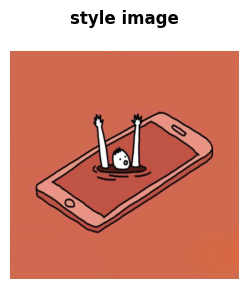

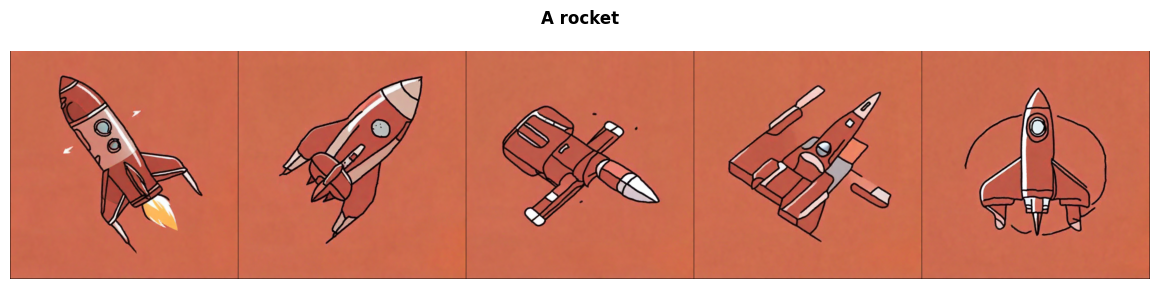

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  
from pipeline_sdxl import ADPipeline
from diffusers import DDIMScheduler, AutoencoderKL
import torch
from utils import *
from accelerate.utils import set_seed


model_name = "/root/models/stable-diffusion-xl-base-1.0/"
vae = ""
lr = 0.015
iters = 2
seed = 42
mixed_precision = "bf16"
num_inference_steps = 50
guidance_scale = 7
num_images_per_prompt = 5
enable_gradient_checkpoint = True
start_layer, end_layer = 64, 70

prompt = "A rocket"
style_image = ["./data/style/1.png"]

scheduler = DDIMScheduler.from_pretrained(model_name, subfolder="scheduler")
pipe = ADPipeline.from_pretrained(
    model_name, scheduler=scheduler, safety_checker=None
)
if vae != "":
    vae = AutoencoderKL.from_pretrained(vae)
    pipe.vae = vae

pipe.classifier = pipe.unet
set_seed(seed)

style_image = torch.cat([load_image(path, size=(1024, 1024)) for path in style_image])
controller = Controller(self_layers=(start_layer, end_layer))

result = pipe.sample(
    controller=controller,
    iters=iters,
    lr=lr,
    adain=True,
    height=1024,
    width=1024,
    mixed_precision="bf16",
    style_image=style_image,
    prompt=prompt,
    negative_prompt="",
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    num_images_per_prompt=num_images_per_prompt,
    enable_gradient_checkpoint=enable_gradient_checkpoint
)

save_image(style_image, "style.png")
save_image(result, "output.png")
show_image("style.png", title="style image")
show_image("output.png", title=prompt)
